In [52]:
import  h5py
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from matplotlib.ticker import MaxNLocator




#--load the data-----
f =  h5py.File("../mutilcellar_datasets/mouse_kidney_2DMALDI.h5",'r')
data = f["data"]  # spectral information.


In [54]:
from kneed import KneeLocator
from sklearn.mixture import GaussianMixture

Latent_z=np.array(data) 
# covariance_type = {'full', 'spherical', 'diag', 'tied'}
cov_Type = 'diag'
n_components = np.arange(3, 20)
models = [GaussianMixture(n, covariance_type=cov_Type, random_state=0).fit(Latent_z)
          for n in n_components]

BIC_Scores = [m.bic(Latent_z) for m in models]
kneedle_point = KneeLocator(n_components, BIC_Scores, curve='convex', direction='decreasing')
print('The suggested number of clusters = ', kneedle_point.knee)
Elbow_idx = np.where(BIC_Scores==kneedle_point.knee_y)[0]

/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, to

The suggested number of clusters =  9


In [45]:
Latent_z.shape

(95000, 120)

No handles with labels found to put in legend.


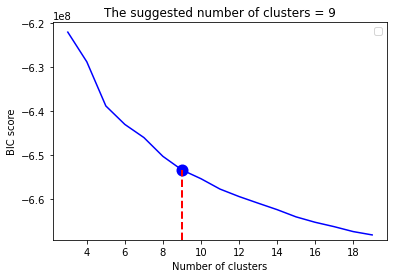

In [59]:
plt.rcParams["figure.figsize"] = (6, 4)
Y=np.linspace(min(BIC_Scores)-1111122,BIC_Scores[Elbow_idx[0]],12)
X=np.ones(Y.size)*n_components[Elbow_idx[0]]

plt.plot(n_components, BIC_Scores,'-b', marker='o',markerfacecolor='blue',
         markeredgewidth='2',markersize=10,markevery=Elbow_idx)

plt.plot(X,Y,color = 'red', linewidth=2, linestyle="--")

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(min(BIC_Scores)-1111122,max(BIC_Scores)+2222222)
#plt.text(x,y,string,fontsize=15,verticalalignment="top",horizontalalignment="right")
plt.legend(loc='best')
plt.xlabel('Number of clusters');
plt.ylabel('BIC score');
plt.title('The suggested number of clusters = '+ np.str(kneedle_point.knee))
plt.savefig("./BIC_fig_result/BIC_Mouse_2DMALDI.pdf")
# plt.plot(n_components, [m.aic(Latent_z) for m in models], label='AIC')
# Ref Kneedle algorithm [V. Satopaa et al., international conference on distributed computing systems workshops. IEEE, 2011.]